# Customer Segmentation using K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset

In [7]:
df = pd.read_excel("OnlineRetail.xlsx")

# Preview data

In [8]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


# Data cleaning: drop null values

In [9]:
df = df.dropna()      #Removes rows with missing values (important because K-Means cannot handle NaNs).

# Create TotalAmount column

In [18]:
df["TotalAmount"] = df["Quantity"] * df["Price"]

# Group data by CustomerID

In [19]:
customer_df = df.groupby("Customer ID").agg({
    "Invoice": "count",     # Frequency of purchases
    "Quantity": "sum",      # Total quantity purchased
    "TotalAmount": "sum"    # Total spending
}).rename(columns={"Invoice": "Frequency"})

#Groups purchases per customer (because we want segmentation of customers, not products).

#Shows first 5 customers with their features.

In [20]:
print(customer_df.head())

             Frequency  Quantity  TotalAmount
Customer ID                                  
12346.0             46        52       -64.68
12347.0             71       828      1323.32
12348.0             20       373       222.16
12349.0            107       988      2646.99
12351.0             21       261       300.93


# Standardize the data (important for K-Means,Standardizes values → converts all features to the same scale (mean=0, variance=1)

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

# Without scaling, customers with big spending would dominate clustering.

# Apply K-Means clustering

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)               #n_clusters=4 → divide customers into 4 groups.
customer_df["Cluster"] = kmeans.fit_predict(scaled_data)     #fit_predict() assigns each customer to a cluster.

# Visualize clusters

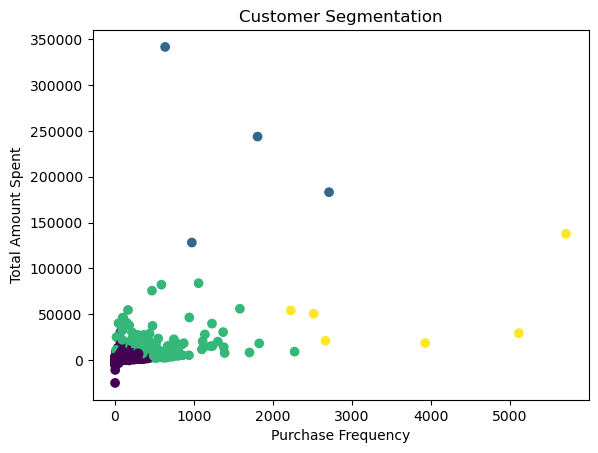

In [28]:
plt.scatter(customer_df["Frequency"], customer_df["TotalAmount"], 
            c=customer_df["Cluster"], cmap="viridis")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Amount Spent")
plt.title("Customer Segmentation")
plt.show()

#Points are colored by cluster → shows how customers are grouped.

#Elbow Method to find best k

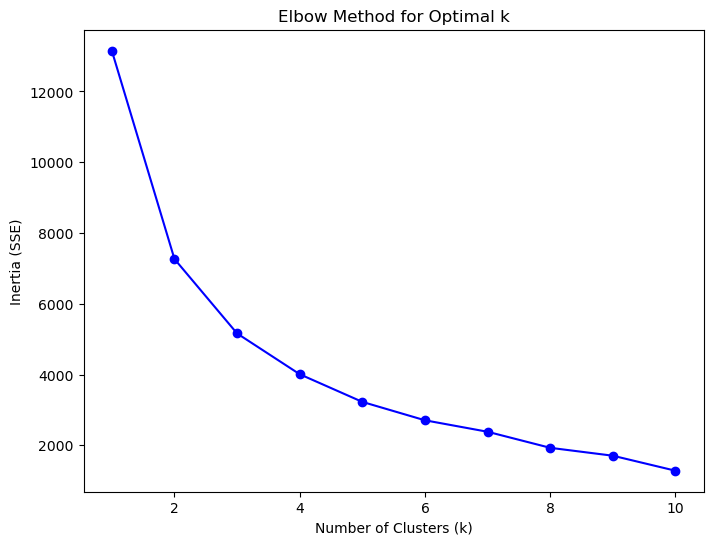

In [29]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Save clustered data

In [30]:
customer_df.to_csv("customer_segments.csv")
print("Segmentation complete! Results saved to customer_segments.csv")

Segmentation complete! Results saved to customer_segments.csv


#Results & Insights

The algorithm successfully divided customers into distinct groups based on their purchasing patterns.

Example cluster interpretations:

Cluster 0: Low spending, low frequency → casual buyers.

Cluster 1: High spending, frequent purchases → loyal premium customers.

Cluster 2: Medium purchases, moderate spending → regular customers.

Cluster 3: Rare purchases but high spending → occasional big spenders.